# Objective 

#### Analyze the data and draw conclusions on the distribution and nature of crime in Montreal City. 

## Insights to Gather

1. What are the top 3 prevalent crimes or offenses committed in Montreal City?
2. What part of the day did most crime incidents occur?
3. Which top 5 police precincts (PDQ) got the most crime complaints?
4. Which are the top 3 PDQs that got the least crime complaints?
5. Which neighborhoods recorded the highest crime incidents and what are the crime types in these neighborhoods?
6. Which neighborhood has the most cases of murder?

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# importing csv and storing it under variable df
df = pd.read_csv('data/actes-criminels.csv')

# looking at ten random samples in the dataset
df.sample(n = 10, random_state = 42)

,Categorie,Category,Date,Time of Day,PDQ,x,y,Latitude,Longitude
239171,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-21,nuit,5.0,286738.781,5034640.500,-73.730911,45.451461
241143,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-13,soir,46.0,301170.719,5052541.000,-73.546533,45.612761
71477,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2017-04-08,soir,35.0,NaN,NaN,NaN,NaN
220515,Méfait,Mischief,2022-02-03,soir,26.0,296411.468,5039514.749,-73.607330,45.495505
145543,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2019-10-20,nuit,38.0,298718.852,5040797.622,-73.577823,45.507073
8442,Vol de véhicule à moteur,Theft of Motor Vehicle,2016-02-01,nuit,39.0,294232.206,5049929.965,-73.635438,45.589195
141468,Vols qualifiés,Robbery,2019-05-29,jour,23.0,301924.195,5046352.614,-73.536836,45.557079
130051,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2018-12-01,jour,38.0,297820.809,5042397.078,-73.589339,45.521457
126634,Introduction,Breaking & Entering,2019-09-15,jour,13.0,294577.750,5031274.500,-73.630621,45.421331
65022,Vols qualifiés,Robbery,2016-11-05,soir,21.0,299962.840,5041609.764,-73.561911,45.514391


In [2]:
# taking a look at the landscape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244117 entries, 0 to 244116
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Categorie    244117 non-null  object 
 1   Category     244117 non-null  object 
 2   Date         244117 non-null  object 
 3   Time of Day  244117 non-null  object 
 4   PDQ          244112 non-null  float64
 5   x            202724 non-null  float64
 6   y            202724 non-null  float64
 7   Latitude     202724 non-null  float64
 8   Longitude    202724 non-null  float64
dtypes: float64(5), object(4)
memory usage: 16.8+ MB


In [3]:
# searching for null values by column
df.isnull().sum()

Categorie          0
Category           0
Date               0
Time of Day        0
PDQ                5
x              41393
y              41393
Latitude       41393
Longitude      41393
dtype: int64

In [4]:
# getting a quick statistical overview of numerical values in dataset
# also rounding the decimals to the second decimal point
round(df.describe(),2)

,PDQ,x,y,Latitude,Longitude
count,244112.00,202724.00,202724.00,202724.00,202724.00
mean,26.32,295794.17,5043227.57,-73.62,45.53
std,14.03,6085.98,6070.39,0.08,0.05
min,1.00,268109.61,5029291.47,-73.97,45.40
25%,15.00,293900.98,5039087.60,-73.64,45.49
50%,26.00,297338.25,5042878.08,-73.60,45.53
75%,39.00,299665.90,5047188.21,-73.57,45.56
max,55.00,306389.86,5062496.46,-73.48,45.70


## What are the Top 3 more prevalent crimes or offenses in Montreal city?

### Steps to get there

#### There are a couple of ways to build the table

+ Option 1: Create a table by calling on the Category column directly and using the .value_counts function
### OR
+ Option 2: Create a table grouped by the Category column and using the .count function 


### Next Steps

1. Now that we have the counts, it would be helpful to know what the population of Montreal City is (Google: 1,780,000)
2. Calculate each respective crime for every 100,000 MTL residents --- > (Crime Count/ 1,780,000 Million) * 100,000
3. The results aims to provide better context around the crime (Ie. For every 100,000 residents there will be 4,061 Thefts From / To Motor Vehicle)
4. Build a visual to display the results

In [5]:
# building a table by calling on the Category column directly and applying value_counts function
# renaming both columns
dt = df['Category'].value_counts().reset_index().rename({"index" : "Crime", "Category" : "Crime Count"}, axis = 1)
dt

,Crime,Crime Count
0,Theft From / To Motor Vehicle,72291
1,Breaking & Entering,61107
2,Mischief,53720
3,Theft of Motor Vehicle,43135
4,Robbery,13639
5,Murder Resulting in Death,225


In [6]:
# creating a new column that will divide the crime count by the total population * 100000 to calculate the count by 100,000 residents
dt['per/100000'] = round((dt['Crime Count'] / 1780000) * 100000, 0).astype(int)

# ranking the crimes by the count descending the highest count at the top
dt['rank'] = dt['Crime Count'].rank(method = 'dense', ascending = False).astype(int)

# looking at the table to ensure the data adds up
dt

,Crime,Crime Count,per/100000,rank
0,Theft From / To Motor Vehicle,72291,4061,1
1,Breaking & Entering,61107,3433,2
2,Mischief,53720,3018,3
3,Theft of Motor Vehicle,43135,2423,4
4,Robbery,13639,766,5
5,Murder Resulting in Death,225,13,6


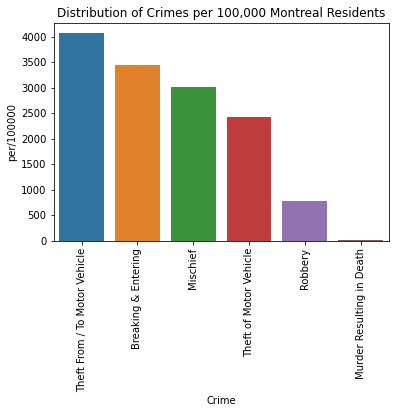

In [7]:
# creating a barplot using seaborn and passing the Crime and count per/100000 residents as the data source
sns.barplot(x = 'Crime', y = 'per/100000', data = dt)

# adding a title to the chart
plt.title('Distribution of Crimes per 100,000 Montreal Residents')

# rotating the axis labels to 90 degrees
plt.xticks(rotation = 90)

# displaying chart created
plt.show();

In [8]:
# filtering the table to see which are the three most prevalent crimes 
# since we used a rank function, specifically for this scenario all that needs to be done is filter by rank where it is <= 3
top_three_crimes =  dt[dt['rank'] <= 3]

top_three_crimes

,Crime,Crime Count,per/100000,rank
0,Theft From / To Motor Vehicle,72291,4061,1
1,Breaking & Entering,61107,3433,2
2,Mischief,53720,3018,3


In [9]:
# calculating the total sum of crimes per 100,000 MTL residents
total_crime_count = top_three_crimes['per/100000'].sum()

crimes = top_three_crimes

# printing out statement
print(f"The top three most prevalent crimes in Montreal make up for {total_crime_count} incidents for every 100,000 residents in Montreal City.")

The top three most prevalent crimes in Montreal make up for 10512 incidents for every 100,000 residents in Montreal City.


### Key Takeways

#### Objective: 3 Most Prevalent Crimes

1. Theft From / to Motor Vehicle
2. Breaking & Entering
3. Mischief

+ Making up for 10,512 Incidents for every 100,000 residents in the City

### Question 2: What part of the day did most incidents occur?

#### Next Steps

+ Build a table grouped by the time of day, counting the total number of incidents per time of day
+ Create a visual to display findings

In [10]:
time_of_day = df['Time of Day'].value_counts().reset_index().rename({"index" : "Time of Day" , "Time of Day" : "Incident Count"}, axis = 1)
time_of_day

,Time of Day,Incident Count
0,jour,124382
1,soir,81612
2,nuit,38123


### Making a Change

+ Add a new column called Time of Day but in English for clarity


In [13]:
day_dict = {"jour" : "day", "soir" : "evening", "nuit" : "night"}

time_of_day['Time of Day (ENG)'] = time_of_day['Time of Day'].replace(day_dict)

time_of_day

,Time of Day,Incident Count,Time of Day (ENG)
0,jour,124382,day
1,soir,81612,evening
2,nuit,38123,night


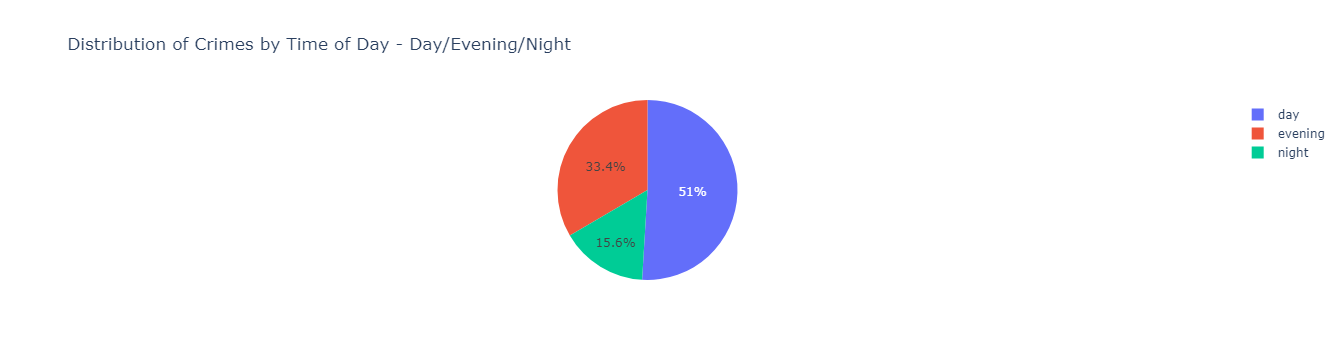

In [24]:
import plotly.express as px

fig = px.pie(data_frame = time_of_day, values = 'Incident Count', names = 'Time of Day (ENG)', title = 'Distribution of Crimes by Time of Day - Day/Evening/Night')
fig.show()